**VERİ BİLİMİ PROJESİ**

### Soru 1
`merged_water_data.csv` dosyasını okuyun ve ilk 5 satırını görüntüleyin.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Dosyayı okuma
df = pd.read_csv("C:\\Users\\Acer\\OneDrive\\Desktop\\Veri Bilimi ve Yapay Zeka Atölyesi\\merged_water_data.csv")
df.head()

,Country,Year,Total Water Consumption (Billion Cubic Meters),Per Capita Water Use (Liters per Day),Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Rainfall Impact (Annual Precipitation in mm),Groundwater Depletion Rate (%),Water Scarcity Level,region,consumption_liters,City,Water_Distribution_m3
0,Argentina,2000,481.490000,235.431429,48.550000,20.844286,30.100000,1288.698571,3.255714,Moderate,NaN,NaN,NaN,NaN
1,Australia,2000,545.040000,296.130000,54.663750,32.665000,21.756250,1549.731250,2.366250,Moderate,NaN,NaN,NaN,NaN
2,Brazil,2000,535.302857,254.058571,48.392857,21.062857,25.734286,1835.337143,2.567143,Moderate,NaN,NaN,NaN,NaN
3,Canada,2000,382.514615,236.620000,51.286154,21.674615,26.309231,1423.098462,2.273846,Moderate,NaN,NaN,NaN,NaN
4,China,2000,681.028333,304.215000,59.855000,29.288333,31.201667,1162.198333,2.950000,Low,NaN,NaN,NaN,NaN


merged_water_data.csv dosyasındaki toplam satır, sütun

In [4]:
print("Toplam satır, sütun:", df.shape)

Toplam satır, sütun: (580, 14)


`merged_water_data.csv` dosyasındaki tamamen ya da %95'ten fazla boş olan sütunlar.

In [5]:
threshold = 0.95
missing_per_column = df.isnull().mean()
cols_to_drop = missing_per_column[missing_per_column > threshold].index.tolist()
df_cleaned = df.drop(columns=cols_to_drop)
print(f"Tamamen ya da neredeyse tamamen boş sütunlar: {cols_to_drop}")

Tamamen ya da neredeyse tamamen boş sütunlar: ['City', 'Water_Distribution_m3']


`merged_water_data.csv` dosyasındaki eksik değer içeren satırların sayısı

In [6]:
missing_rows = df_cleaned[df_cleaned.isnull().any(axis=1)]
print(f"Toplam eksik değer içeren satır sayısı: {len(missing_rows)}")

Toplam eksik değer içeren satır sayısı: 480


`merged_water_data.csv` dosyasındaki boş sütunları silme ve boş hücreleri ortalama ile doldurma(sadece sayısal sütunlar için)

In [ ]:
df = df.dropna(axis=1, how="all")

df = df.fillna(df.mean(numeric_only=True))


### Soru 3
Veri setinde eksik değerlerin hangi sütunlarda ve kaç adet olduğunu analiz edin.

In [8]:
# Eksik veri analizi
print(df.isnull().sum())

Country                                             0
Year                                                0
Total Water Consumption (Billion Cubic Meters)      0
Per Capita Water Use (Liters per Day)               0
Agricultural Water Use (%)                          0
Industrial Water Use (%)                            0
Household Water Use (%)                             0
Rainfall Impact (Annual Precipitation in mm)        0
Groundwater Depletion Rate (%)                      0
Water Scarcity Level                                0
region                                            480
consumption_liters                                  0
dtype: int64


merged_water_data.csv dosyasında temizlik sonrası toplam satır, sütun

In [ ]:
print("\nTemizlik sonrası toplam satır, sütun:", df.shape)

### Soru 4
`merged_water_data.csv` dosyasının sütunlarını görüntüleyin.

In [9]:
#Önce sütunları kontrol edelim
print(df.columns)

Index(['Country', 'Year', 'Total Water Consumption (Billion Cubic Meters)',
       'Per Capita Water Use (Liters per Day)', 'Agricultural Water Use (%)',
       'Industrial Water Use (%)', 'Household Water Use (%)',
       'Rainfall Impact (Annual Precipitation in mm)',
       'Groundwater Depletion Rate (%)', 'Water Scarcity Level', 'region',
       'consumption_liters'],
      dtype='object')


### Soru 5
`merged_water_data.csv` dosyasında kaç farklı ülke vardır ve her ülkenin toplam su tüketimi ne kadardır?

In [8]:
# Ülke Sayısı
country_count = df['Country'].nunique()
print("Farklı ülke sayısı:", country_count)

# Ülkelere Göre Toplam Su Tüketimi
total_consumption = df.groupby('Country')['Total Water Consumption (Billion Cubic Meters)'].sum()
print("\nÜlkelere göre toplam su tüketimi (milyar m³):")
print(total_consumption)

Farklı ülke sayısı: 20

Ülkelere göre toplam su tüketimi (milyar m³):
Country
Argentina       15511.920759
Australia       13336.958389
Brazil          16016.217436
Canada          14967.530246
China           14613.552733
France          13718.532850
Germany         14924.676927
India           14386.816118
Indonesia       14388.087472
Italy           14203.327513
Japan           13968.459217
Mexico          14074.307588
Russia          14312.403243
Saudi Arabia    15385.998679
South Africa    14700.806893
South Korea     13365.803481
Spain           13440.139075
Turkey          14241.457374
UK              14237.619399
USA             15326.410844
Name: Total Water Consumption (Billion Cubic Meters), dtype: float64


### Soru 6
Ülkeler bazında toplam su tüketimini hesaplayın ve en yüksek su tüketimine sahip ülkeyi belirleyin.

In [9]:
# En yüksek su tüketimine sahip ülke
highest_consumption_country = df.groupby('Country')['Total Water Consumption (Billion Cubic Meters)'].sum().sort_values(ascending=False).head(1)
print("En yüksek su tüketimine sahip ülke:")
print(highest_consumption_country)

En yüksek su tüketimine sahip ülke:
Country
Brazil    16016.217436
Name: Total Water Consumption (Billion Cubic Meters), dtype: float64


### Soru 7
2000 yılı verilerini kullanarak kişi başına en yüksek su tüketimine sahip ülkeyi belirleyin.

In [10]:
# 2000 yılında kişi başına en yüksek su tüketimi
highest_per_capita_consumption_2000 = df[df['Year']==2000].sort_values('Per Capita Water Use (Liters per Day)', ascending=False).head(1)
print("2000 yılında kişi başına en yüksek su tüketimi:")
print(highest_per_capita_consumption_2000)

2000 yılında kişi başına en yüksek su tüketimi:
  Country  Year  Total Water Consumption (Billion Cubic Meters)  \
7   India  2000                                        422.3925   

   Per Capita Water Use (Liters per Day)  Agricultural Water Use (%)  \
7                                 404.35                     37.4875   

   Industrial Water Use (%)  Household Water Use (%)  \
7                     39.08                   23.735   

   Rainfall Impact (Annual Precipitation in mm)  \
7                                      1568.955   

   Groundwater Depletion Rate (%) Water Scarcity Level region  \
7                           2.265                  Low    NaN   

   consumption_liters  City  Water_Distribution_m3  
7                 NaN   NaN                    NaN  


### Soru 8
Ülkeler bazında toplam su tüketiminin yıllık büyüme oranlarını hesaplayın ve en yüksek büyüme oranına sahip yılları sıralayın.

In [11]:
df['Growth_Rate'] = df.groupby('Country')['Total Water Consumption (Billion Cubic Meters)'].pct_change()
print(df[['Country', 'Year', 'Growth_Rate']].dropna().sort_values(by='Growth_Rate', ascending=False).head())

       Country  Year  Growth_Rate
561  Australia  2024     2.099232
26     Germany  2001     2.003515
206    Germany  2010     1.487645
157     Turkey  2007     1.127305
430      Japan  2021     0.998792


### Soru 9
Ülkeler bazında kişi başı su kullanımı ile toplam su tüketimi arasındaki korelasyonu hesaplayın ve sonucu yorumlayın.

In [12]:
# Ülkeler bazında ortalama kişi başı su kullanımı ve toplam su tüketimi
country_stats = df.groupby('Country').agg({
    'Per Capita Water Use (Liters per Day)': 'mean',
    'Total Water Consumption (Billion Cubic Meters)': 'sum'
}).reset_index()

# Korelasyonu hesapla
corr = country_stats['Per Capita Water Use (Liters per Day)'].corr(
    country_stats['Total Water Consumption (Billion Cubic Meters)']
)
print("Korelasyon katsayısı:", corr)

# Basit yorum
if corr > 0:
    print("Pozitif korelasyon: Kişi başına su kullanımı yüksek olan ülkelerde toplam su tüketimi de genellikle yüksek.")
elif corr < 0:
    print("Negatif korelasyon: Kişi başına su kullanımı yüksek olan ülkelerde toplam su tüketimi düşük.")
else:
    print("Korelasyon yok veya çok zayıf.")

Korelasyon katsayısı: -0.10409262206259927
Negatif korelasyon: Kişi başına su kullanımı yüksek olan ülkelerde toplam su tüketimi düşük.


### Soru 10
Ülkeler bazında gruplayarak toplam su tüketiminin ortalama değerlerini hesaplayın.

In [13]:
# Gruplu özet
print(df.groupby('Country')['Total Water Consumption (Billion Cubic Meters)'].mean())

Country
Argentina       534.893819
Australia       459.895117
Brazil          552.283360
Canada          516.121733
China           503.915611
France          473.052857
Germany         514.644032
India           496.097108
Indonesia       496.140947
Italy           489.769914
Japan           481.671007
Mexico          485.320951
Russia          493.531146
Saudi Arabia    530.551679
South Africa    506.924376
South Korea     460.889775
Spain           463.453072
Turkey          491.084737
UK              490.952393
USA             528.496926
Name: Total Water Consumption (Billion Cubic Meters), dtype: float64


### Soru 11
Yüksek su kıtlığı seviyesine sahip ülkeleri ve bu durumun gözlemlendiği yılları belirleyin.

In [14]:
# Yüksek su kıtlığı seviyesine sahip ülkeler ve yıllar
scarce = df[df['Water Scarcity Level']=='High']
print(scarce[['Country', 'Year']].drop_duplicates())

          Country  Year
51         Mexico  2002
63         Canada  2003
86        Germany  2004
89          Italy  2004
108     Indonesia  2005
113  Saudi Arabia  2005
136         Spain  2006
168     Indonesia  2008
219           USA  2010
226       Germany  2011
262        Brazil  2013
263        Canada  2013
283        Canada  2014
304         China  2015
333  Saudi Arabia  2016
343        Canada  2017
456         Spain  2022
579           USA  2024


### Soru 12
Kişi başına su kullanımı verisinde aykırı değerleri tespit edin ve hangi ülkelerde ve yıllarda ortaya çıktığını belirleyin.

In [15]:
# Aykırı değer analizi: Kişi başına su kullanımı
q1 = df['Per Capita Water Use (Liters per Day)'].quantile(0.25)
q3 = df['Per Capita Water Use (Liters per Day)'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['Per Capita Water Use (Liters per Day)'] < q1 - 1.5*iqr) | (df['Per Capita Water Use (Liters per Day)'] > q3 + 1.5*iqr)]
print(outliers[['Country','Year','Per Capita Water Use (Liters per Day)']])

       Country  Year  Per Capita Water Use (Liters per Day)
7        India  2000                             404.350000
9        Italy  2000                             398.741667
51      Mexico  2002                             139.861000
89       Italy  2004                             124.697778
120  Argentina  2006                             111.708333
147      India  2007                             381.557143
168  Indonesia  2008                             172.441429
263     Canada  2013                             140.288000


### Soru 12
Türkiye’nin su tüketimi için temel istatistikleri hesaplayın ve yorumlayın.

In [16]:
# Türkiye'nin su tüketimi istatistikleri
turkey_stats = df[df['Country']=='Turkey'].describe().T
print(turkey_stats)

                                                count          mean  \
Year                                             29.0  2.013517e+03   
Total Water Consumption (Billion Cubic Meters)   29.0  4.910847e+02   
Per Capita Water Use (Liters per Day)            29.0  2.748285e+02   
Agricultural Water Use (%)                       29.0  5.115149e+01   
Industrial Water Use (%)                         29.0  2.955017e+01   
Household Water Use (%)                          29.0  2.441116e+01   
Rainfall Impact (Annual Precipitation in mm)     29.0  1.492182e+03   
Groundwater Depletion Rate (%)                   29.0  2.477787e+00   
consumption_liters                                5.0  2.295676e+06   
City                                              0.0           NaN   
Water_Distribution_m3                             0.0           NaN   
Growth_Rate                                      28.0  5.067474e-02   

                                                         std           min  

### Soru 13
Ülkeler bazında hane halkı su kullanımının ortalamasını hesaplayın ve en yüksek 5 ülkeyi belirleyin.

In [17]:
# Hane halkı su kullanımı analizi
top_household = df.groupby('Country')['Household Water Use (%)'].mean().sort_values(ascending=False).head(5)
print(top_household)

Country
Australia       25.830779
Italy           25.693180
Argentina       25.584528
Saudi Arabia    25.425360
UK              25.236450
Name: Household Water Use (%), dtype: float64


### Soru 14
Ülkeler bazında ortalama toplam su tüketimini hesaplayın ve en yüksek ve en düşük tüketime sahip ülkeleri belirleyin.

In [18]:
city_consumption = df.groupby('Country')['Total Water Consumption (Billion Cubic Meters)'].mean().sort_values(ascending=False)
print("En yüksek su tüketen ülkeler:\n", city_consumption.head())
print("En düşük su tüketen ülkeler:\n", city_consumption.tail())

En yüksek su tüketen ülkeler:
 Country
Brazil          552.283360
Argentina       534.893819
Saudi Arabia    530.551679
USA             528.496926
Canada          516.121733
Name: Total Water Consumption (Billion Cubic Meters), dtype: float64
En düşük su tüketen ülkeler:
 Country
Japan          481.671007
France         473.052857
Spain          463.453072
South Korea    460.889775
Australia      459.895117
Name: Total Water Consumption (Billion Cubic Meters), dtype: float64


### Soru 15
Ülkeler ve yıllar bazında su kıtlığı seviyelerini özetleyen bir pivot tablo oluşturun ve her hücrede en sık gözlemlenen (mod) değeri gösterin.

In [19]:
# Pivot tablo oluşturma
pivot = df.pivot_table(index='Country', columns='Year', values='Water Scarcity Level', aggfunc=lambda x: x.mode()[0] if not x.mode().empty else None)
print(pivot)

Year              2000      2001      2002      2003      2004      2005  \
Country                                                                    
Argentina     Moderate  Moderate  Moderate  Moderate  Moderate  Moderate   
Australia     Moderate  Moderate  Moderate  Moderate  Moderate  Moderate   
Brazil        Moderate  Moderate  Moderate       Low  Moderate  Moderate   
Canada        Moderate       Low       Low      High       Low  Moderate   
China              Low       Low  Moderate  Moderate       Low  Moderate   
France        Moderate  Moderate  Moderate       Low       Low  Moderate   
Germany       Moderate  Moderate  Moderate  Moderate      High  Moderate   
India              Low  Moderate       Low  Moderate  Moderate       Low   
Indonesia     Moderate  Moderate  Moderate  Moderate       Low      High   
Italy              Low  Moderate  Moderate  Moderate      High  Moderate   
Japan         Moderate  Moderate  Moderate  Moderate  Moderate       Low   
Mexico      

### Soru 16
En çok tüketim yapılan günlerdeki değerler, ortalama tüketimden ne kadar farklı?

In [20]:
# Günlük tüketim verisi olan satırları seç
daily_data = df.dropna(subset=['consumption_liters'])

# Ortalama günlük tüketim
mean_daily = daily_data['consumption_liters'].mean()

# En yüksek günlük tüketim değerleri (ilk 5 gün örnek)
top_days = daily_data.nlargest(5, 'consumption_liters')

# Bu günlerin ortalamadan farkı
top_days['Fark (En Çok - Ortalama)'] = top_days['consumption_liters'] - mean_daily

print("Ortalama günlük tüketim:", mean_daily)
print("\nEn çok tüketim yapılan günler ve ortalamadan farkları:")
print(top_days[['consumption_liters', 'Fark (En Çok - Ortalama)']])


Ortalama günlük tüketim: 2295676.4780000006

En çok tüketim yapılan günler ve ortalamadan farkları:
     consumption_liters  Fark (En Çok - Ortalama)
461          2358434.27                 62757.792
466          2358434.27                 62757.792
471          2358434.27                 62757.792
476          2358434.27                 62757.792
481          2358434.27                 62757.792


### Soru 17
Verilere göre en çok su tasarrufu potansiyeli hangi ülkede bulunuyor?

In [21]:
# Ülke bazında ortalama kullanım yüzdelerini al
avg_usage = df.groupby("Country")[["Agricultural Water Use (%)", 
                                   "Industrial Water Use (%)", 
                                   "Household Water Use (%)"]].mean()

# En yüksek oranı hangi kullanım alanında ve hangi ülkede?
avg_usage["Max_Use (%)"] = avg_usage.max(axis=1)
avg_usage["Sector"] = avg_usage.idxmax(axis=1)

# En fazla tasarruf potansiyeli olan ülkeyi bul
max_country = avg_usage["Max_Use (%)"].idxmax()
max_value = avg_usage.loc[max_country, "Max_Use (%)"]
sector = avg_usage.loc[max_country, "Sector"]

print("En çok su tasarrufu potansiyeli olan ülke:", max_country)
print("Kullanım oranı: %.2f%%" % max_value)
print("Ağırlıklı sektör:", sector)

En çok su tasarrufu potansiyeli olan ülke: Australia
Kullanım oranı: 53.75%
Ağırlıklı sektör: Agricultural Water Use (%)


### Soru 18
Hangi ülkelerin toplam su tüketimi son 20 yılda en çok artmış veya azalmıştır?

In [22]:
# Ülke ve yıl bazında toplam su tüketimini grupla
df_grouped = df.groupby(['Country', 'Year'])['Total Water Consumption (Billion Cubic Meters)'].sum().reset_index()

# 20 yıl öncesi ve son yılı al
son_yil = df_grouped['Year'].max()
baslangic_yil = son_yil - 20

df_start = df_grouped[df_grouped['Year'] == baslangic_yil][['Country', 'Total Water Consumption (Billion Cubic Meters)']].rename(columns={'Total Water Consumption (Billion Cubic Meters)': 'Start_Consumption'})
df_end = df_grouped[df_grouped['Year'] == son_yil][['Country', 'Total Water Consumption (Billion Cubic Meters)']].rename(columns={'Total Water Consumption (Billion Cubic Meters)': 'End_Consumption'})

# Değişimi hesapla
df_diff = pd.merge(df_start, df_end, on='Country')
df_diff['Change'] = df_diff['End_Consumption'] - df_diff['Start_Consumption']

# En çok artan ve azalan ülkeler
en_cok_artan = df_diff.sort_values(by='Change', ascending=False).head(10)
en_cok_azalan = df_diff.sort_values(by='Change', ascending=True).head(10)

print("Son 20 yılda su tüketimi en çok artan ülkeler:")
print(en_cok_artan)

print("\nSon 20 yılda su tüketimi en çok azalan ülkeler:")
print(en_cok_azalan)

Son 20 yılda su tüketimi en çok artan ülkeler:
         Country  Start_Consumption  End_Consumption      Change
10         Japan         437.505000       622.376667  184.871667
18            UK         325.132222       498.778750  173.646528
1      Australia         503.866429       644.005000  140.138571
6        Germany         436.425000       551.202727  114.777727
3         Canada         397.045000       476.976875   79.931875
15   South Korea         515.952308       560.786875   44.834567
7          India         450.940000       479.750909   28.810909
0      Argentina         634.566000       647.790000   13.224000
13  Saudi Arabia         581.548000       555.248571  -26.299429
17        Turkey         580.200714       543.217143  -36.983571

Son 20 yılda su tüketimi en çok azalan ülkeler:
         Country  Start_Consumption  End_Consumption      Change
19           USA         626.240000       249.485000 -376.755000
4          China         798.418000       507.325000 -291.0

### Soru 19
Ülkeler bazında yıllara göre endüstriyel su kullanım trendlerini görselleştirin ve analiz edin.

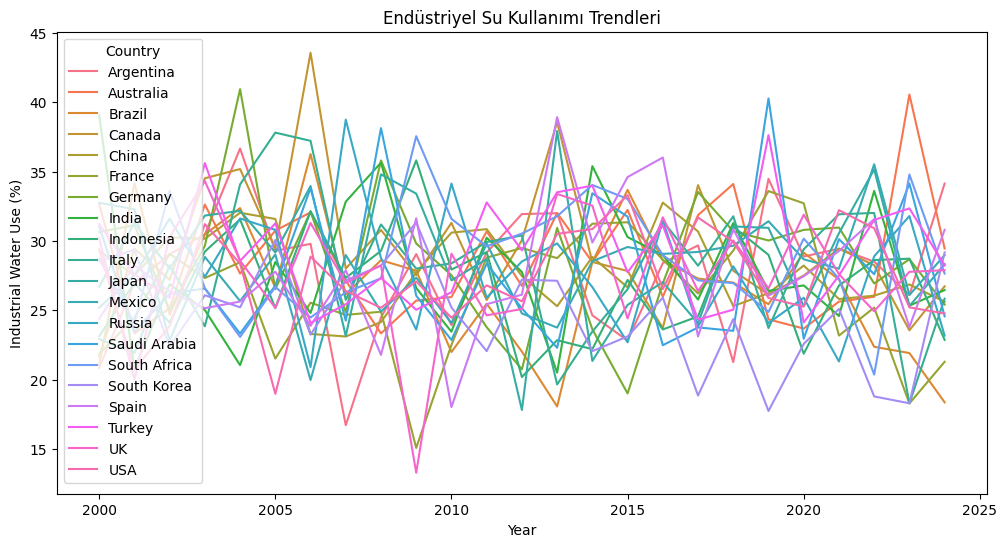

In [23]:
# Endüstriyel su kullanımı trendleri
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Industrial Water Use (%)', hue='Country', data=df)
plt.title('Endüstriyel Su Kullanımı Trendleri')
plt.show()

### Soru 20
Ülkeler bazında yıllara göre yeraltı suyu tükenme oranının değişimini görselleştirin ve analiz edin.

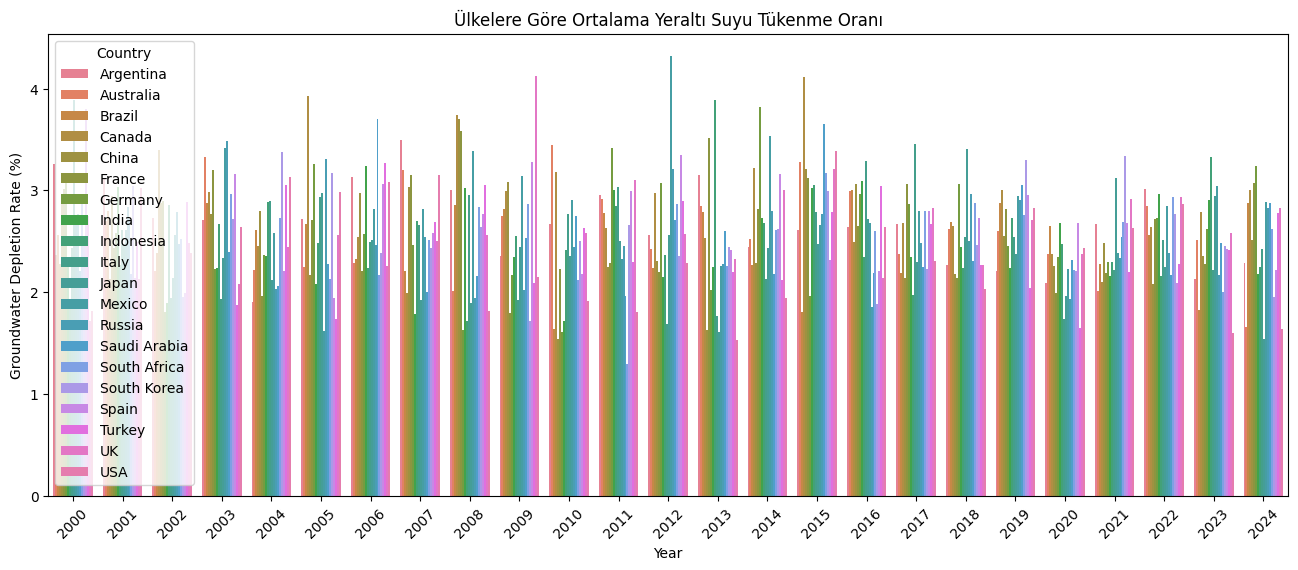

In [24]:
plt.figure(figsize=(16,6))
sns.barplot(x='Year', y='Groundwater Depletion Rate (%)',hue='Country', data=df)
plt.title('Ülkelere Göre Ortalama Yeraltı Suyu Tükenme Oranı')
plt.xticks(rotation=45)  # Ülke isimlerini yana çevir
plt.show()

### Soru 21
Yeraltı suyu tükenme oranının değişimini görselleştirin ve analiz edin.

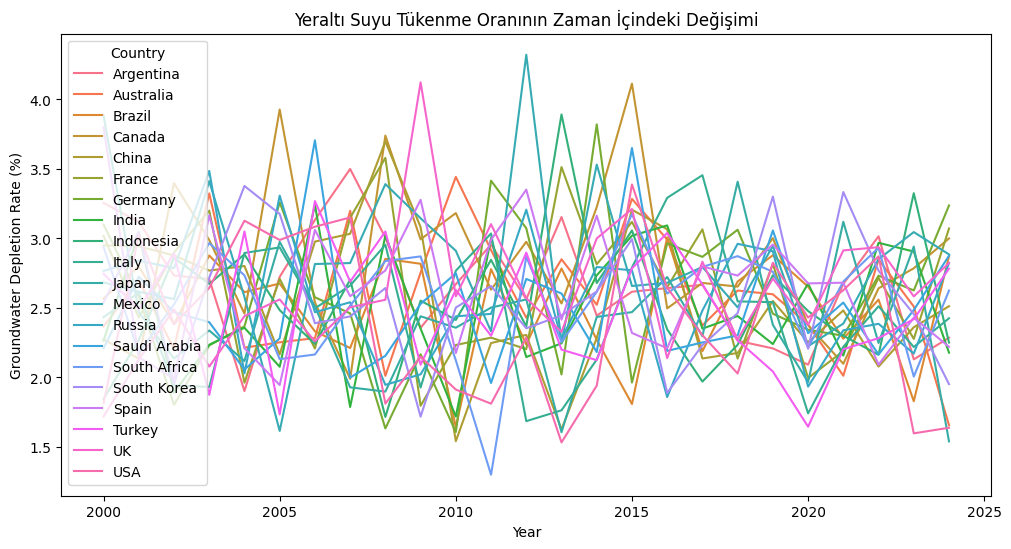

In [25]:
# Yeraltı suyu tükenme oranı analizi
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Groundwater Depletion Rate (%)', hue='Country', data=df)
plt.title('Yeraltı Suyu Tükenme Oranının Zaman İçindeki Değişimi')
plt.show()

### Soru 22
Ülkeler bazında yıllara göre tarımsal su kullanım yüzdelerinin trendlerini görselleştirin.

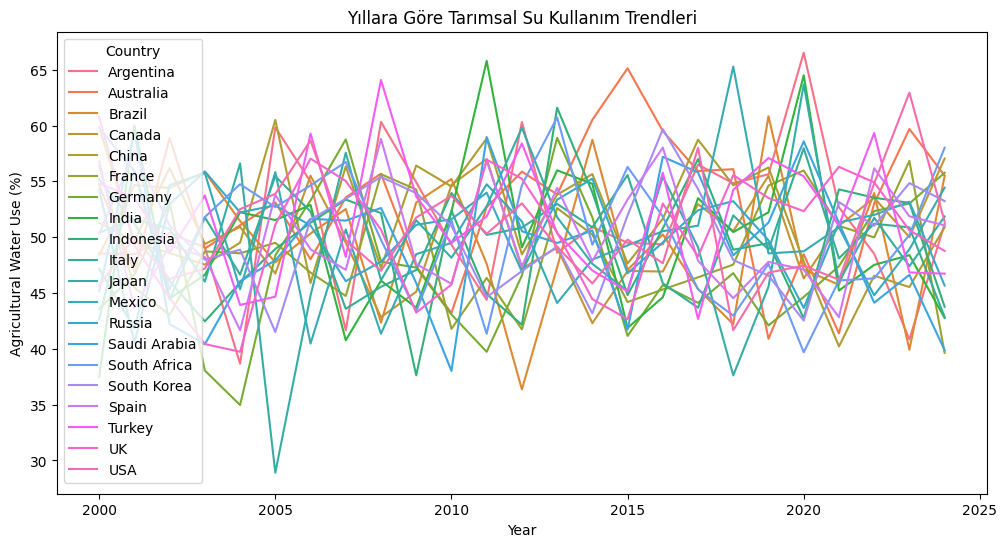

In [26]:
# Tarımsal su kullanımı trendleri
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Agricultural Water Use (%)', hue='Country', data=df)
plt.title('Yıllara Göre Tarımsal Su Kullanım Trendleri')
plt.show()

### Soru 23
Türkiye’nin yıllara göre toplam su tüketim trendini görselleştirin.

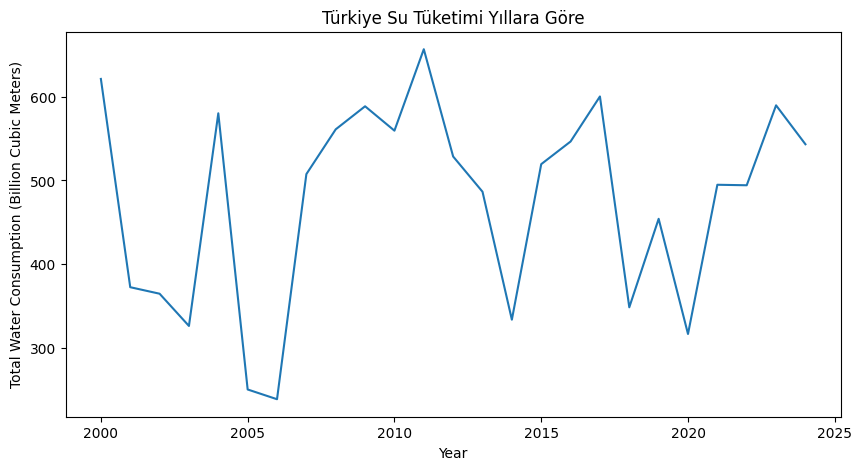

In [27]:
# Türkiye'nin yıllara göre su tüketimi
plt.figure(figsize=(10,5))
turkey = df[df['Country']=='Turkey']
sns.lineplot(x='Year', y='Total Water Consumption (Billion Cubic Meters)', data=turkey)
plt.title('Türkiye Su Tüketimi Yıllara Göre')
plt.show()

### Soru 24
Ülkeler/bölgeler bazında veri dağılımını ve su kıtlığı seviyelerinin dağılımını analiz edin.

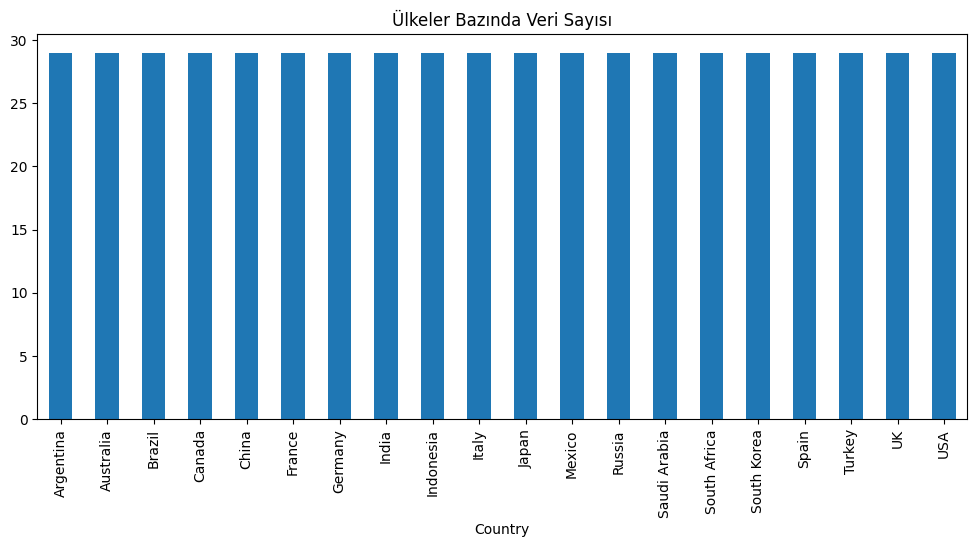

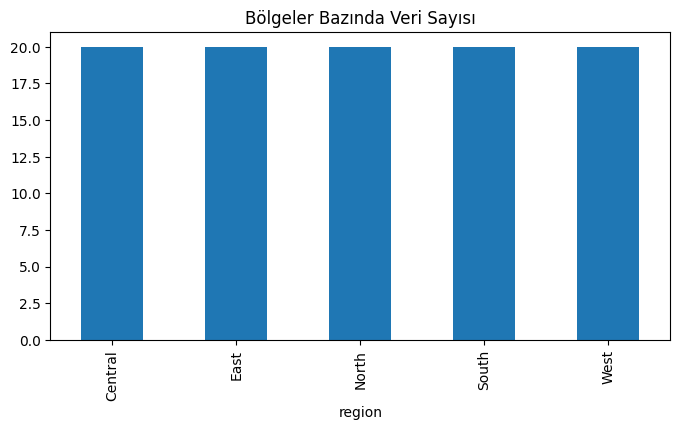

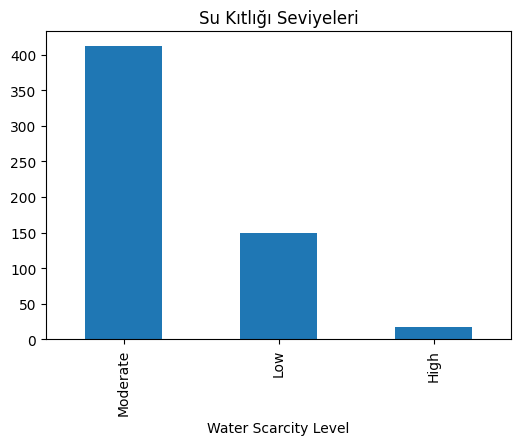

In [28]:
# Ülkeler bazında veri sayısı
df['Country'].value_counts().plot(kind='bar', figsize=(12,5), title="Ülkeler Bazında Veri Sayısı")
plt.show()

# Bölgeler bazında veri sayısı
df['region'].value_counts().plot(kind='bar', figsize=(8,4), title="Bölgeler Bazında Veri Sayısı")
plt.show()

# Su kıtlığı seviyeleri
df['Water Scarcity Level'].value_counts().plot(kind='bar', figsize=(6,4), title="Su Kıtlığı Seviyeleri")
plt.show()

### Soru 25
Bölge/ülke bazında ortalama kişi başına su kullanımını ve kullanım türlerinin (tarımsal, endüstriyel, hanehalkı) dağılımını analiz edin ve karşılaştırın.

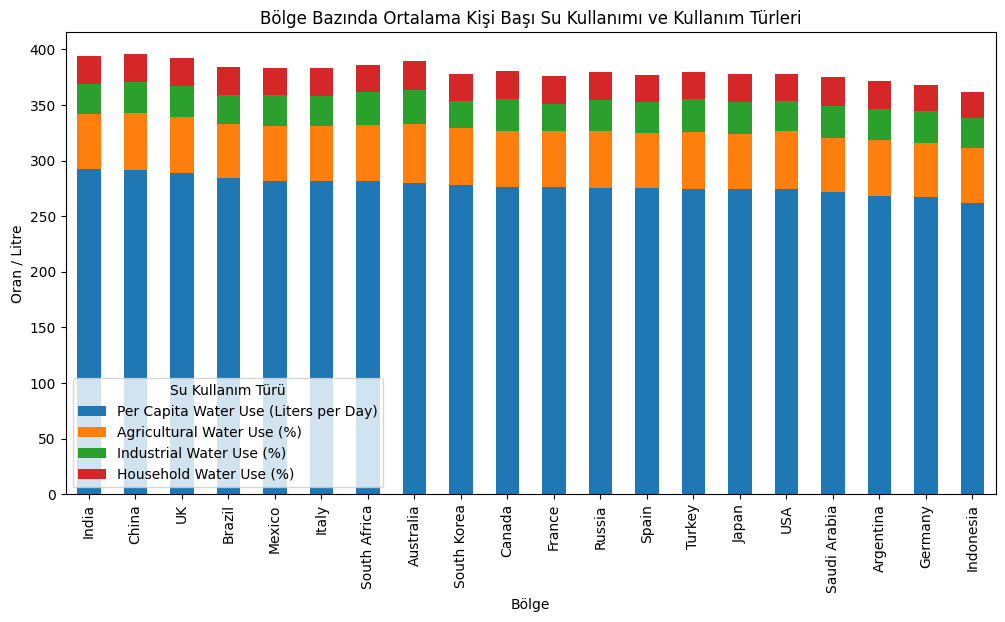

In [29]:
# Bölge bazında ortalamalar
region_avg = df.groupby('Country')[[
    'Per Capita Water Use (Liters per Day)',
    'Agricultural Water Use (%)',
    'Industrial Water Use (%)',
    'Household Water Use (%)'
]].mean().sort_values('Per Capita Water Use (Liters per Day)', ascending=False)

# Bar grafiği: Kişi başı kullanım ve kullanım türleri
region_avg.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Bölge Bazında Ortalama Kişi Başı Su Kullanımı ve Kullanım Türleri')
plt.ylabel('Oran / Litre')
plt.xlabel('Bölge')
plt.legend(title='Su Kullanım Türü')
plt.show()

### Soru 26
Ülkelerin toplam su tüketimi ile yeraltı suyu tükenme oranı arasındaki ilişkiyi inceleyin.

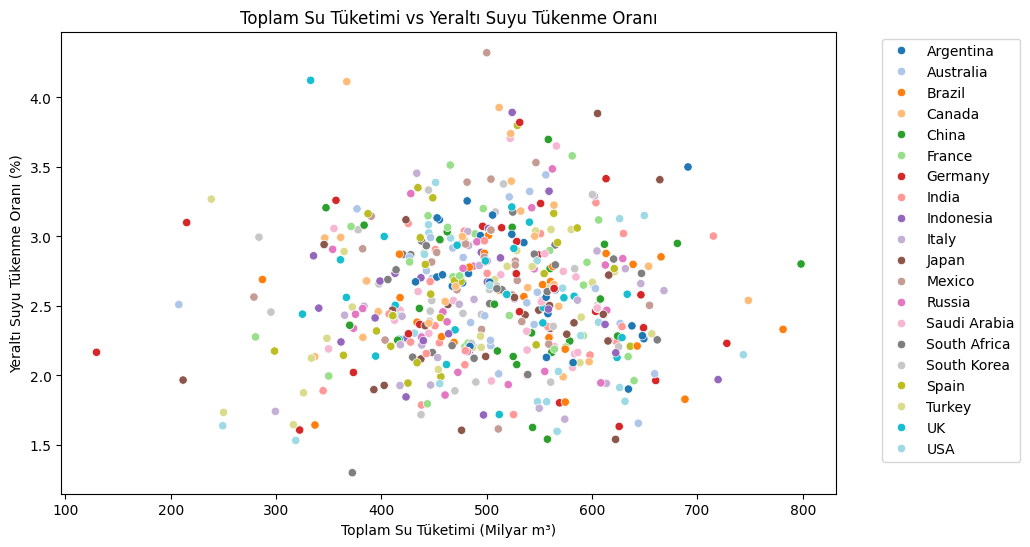

In [30]:
# Scatter Plot: Toplam Su Tüketimi vs Yeraltı Suyu Tükenme Oranı
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Water Consumption (Billion Cubic Meters)',y='Groundwater Depletion Rate (%)',hue='Country', data=df, palette='tab20')
plt.title('Toplam Su Tüketimi vs Yeraltı Suyu Tükenme Oranı')
plt.xlabel('Toplam Su Tüketimi (Milyar m³)')
plt.ylabel('Yeraltı Suyu Tükenme Oranı (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Soru 27
2000–2024 yılları arasında ülkeler bazında kişi başına su kullanımının dağılımını inceleyin ve kişi başı su kullanımının en yüksek olduğu ilk 3 ülkeyi görselleştirin.

<Figure size 1000x600 with 0 Axes>

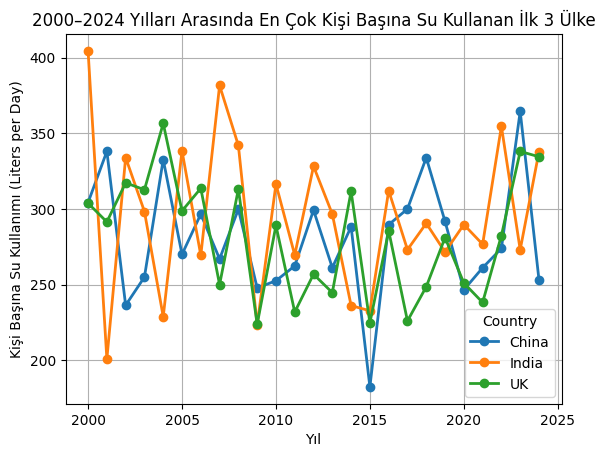

In [31]:
# 2000–2024 yılları arasını filtrele
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2024)]

# Ülkeler bazında ortalama kişi başı su kullanımı
avg_per_country = df_filtered.groupby('Country')['Per Capita Water Use (Liters per Day)'].mean()

# En çok kullanan ilk 3 ülke
top3_countries = avg_per_country.sort_values(ascending=False).head(3).index

# Bu 3 ülkenin yıllık kişi başı su kullanımını pivot table ile al
pivot_top3 = df_filtered[df_filtered['Country'].isin(top3_countries)].pivot_table(
    index='Year', columns='Country', values='Per Capita Water Use (Liters per Day)'
)

# Çizgi grafiği
plt.figure(figsize=(10,6))
pivot_top3.plot(marker='o', linewidth=2)
plt.title('2000–2024 Yılları Arasında En Çok Kişi Başına Su Kullanan İlk 3 Ülke')
plt.xlabel('Yıl')
plt.ylabel('Kişi Başına Su Kullanımı (Liters per Day)')
plt.grid(True)
plt.show()

### Soru 28
2000–2024 yılları arasında ülkeler bazında ortalama kişi başı su kullanımını hesaplayın. Ortalama kullanımın en düşük olduğu ilk 3 ülkeyi belirleyin ve bu ülkeleri bar grafiği ile görselleştirin.

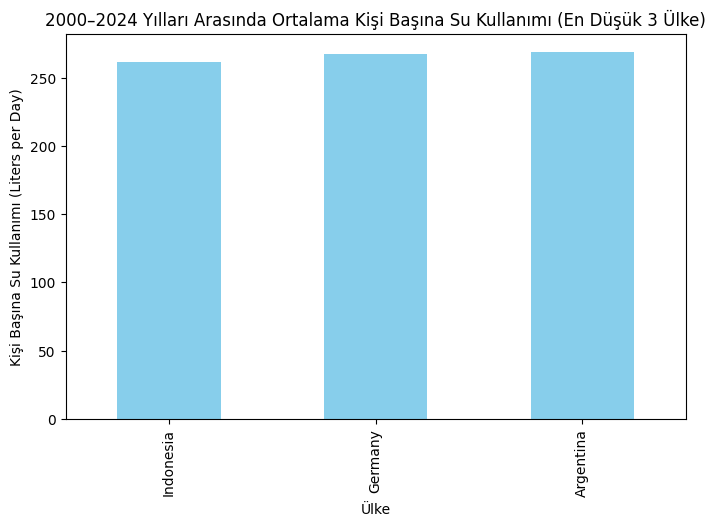

In [32]:
# 2000–2024 yılları arasını filtrele
df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= 2024)]

# Ülkeler bazında ortalama kişi başı su kullanımı
avg_per_country = df_filtered.groupby('Country')['Per Capita Water Use (Liters per Day)'].mean()

# En düşük 3 ülke
bottom3_countries = avg_per_country.nsmallest(3)

# Bar grafiği
plt.figure(figsize=(8,5))
bottom3_countries.plot(kind='bar', color='skyblue')
plt.title('2000–2024 Yılları Arasında Ortalama Kişi Başına Su Kullanımı (En Düşük 3 Ülke)')
plt.xlabel('Ülke')
plt.ylabel('Kişi Başına Su Kullanımı (Liters per Day)')
plt.show()

### Soru 29
Ülkeler bazında evsel su kullanımının dağılımını bar grafiği ile görselleştirin.

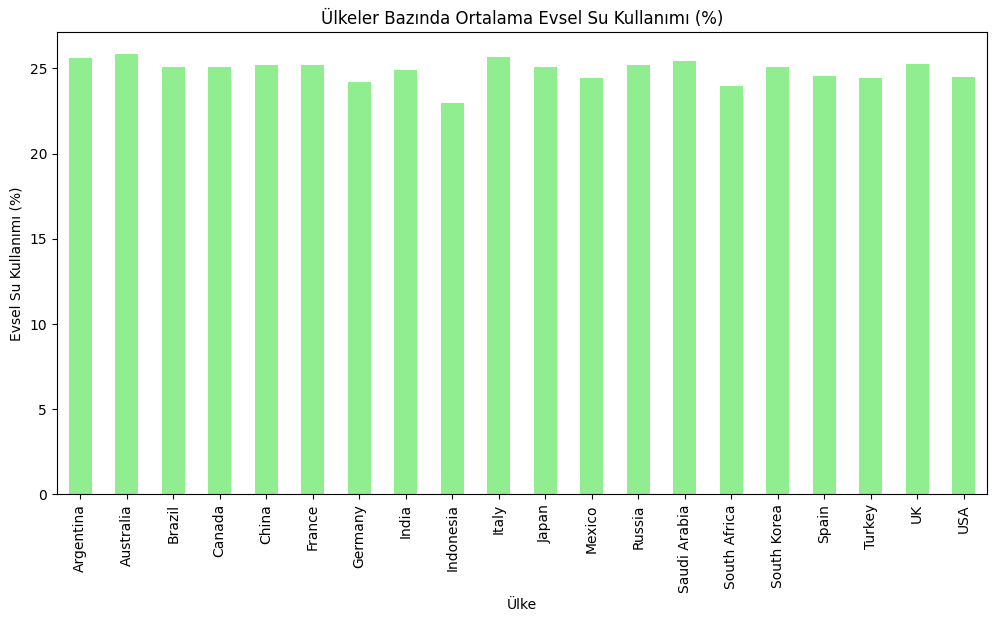

In [33]:
# Ülkeler bazında ortalama evsel su kullanımını hesapla
household_usage = df.groupby('Country')['Household Water Use (%)'].mean()

# Bar grafiği
plt.figure(figsize=(12,6))
household_usage.plot(kind='bar', color='lightgreen')
plt.title('Ülkeler Bazında Ortalama Evsel Su Kullanımı (%)')
plt.xlabel('Ülke')
plt.ylabel('Evsel Su Kullanımı (%)')
plt.xticks(rotation=90)
plt.show()

### Soru 30
Yıllar içindeki su tüketimi nasıl değişmiş görselleştirin.

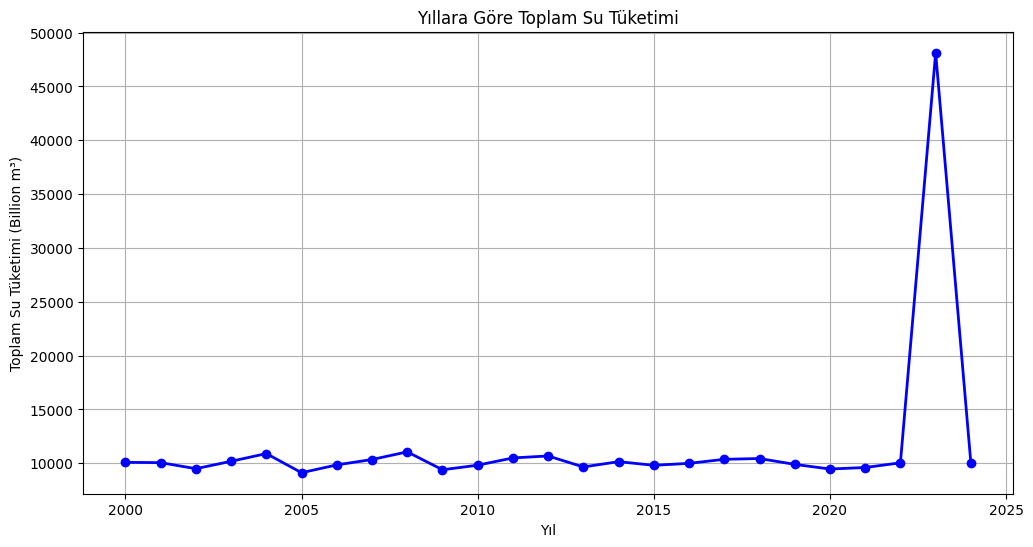

In [34]:
# Yıllar bazında toplam su tüketimi (Billion Cubic Meters)
yearly_consumption = df.groupby('Year')['Total Water Consumption (Billion Cubic Meters)'].sum()

# Çizgi grafiği
plt.figure(figsize=(12,6))
plt.plot(yearly_consumption.index, yearly_consumption.values, marker='o', linewidth=2, color='blue')
plt.title('Yıllara Göre Toplam Su Tüketimi')
plt.xlabel('Yıl')
plt.ylabel('Toplam Su Tüketimi (Billion m³)')
plt.grid(True)
plt.show()

### Soru 31
Türkiye'nin tüketim trendi, dünya ortalaması ile kıyaslandığında nasıl görünüyor.

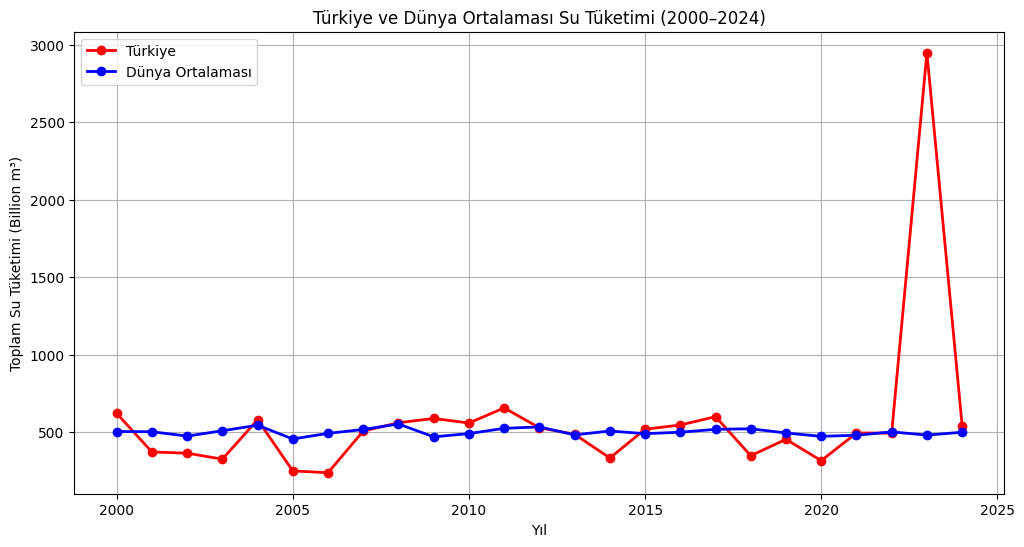

In [35]:
# Yıllar bazında Türkiye'nin toplam su tüketimi
turkey_consumption = df[df['Country'] == 'Turkey'].groupby('Year')['Total Water Consumption (Billion Cubic Meters)'].sum()

# Yıllar bazında dünya ortalama su tüketimi (ülke başına)
world_avg_consumption = df.groupby('Year')['Total Water Consumption (Billion Cubic Meters)'].mean()

# Grafik
plt.figure(figsize=(12,6))
plt.plot(turkey_consumption.index, turkey_consumption.values, marker='o', linewidth=2, label='Türkiye', color='red')
plt.plot(world_avg_consumption.index, world_avg_consumption.values, marker='o', linewidth=2, label='Dünya Ortalaması', color='blue')

plt.title('Türkiye ve Dünya Ortalaması Su Tüketimi (2000–2024)')
plt.xlabel('Yıl')
plt.ylabel('Toplam Su Tüketimi (Billion m³)')
plt.legend()
plt.grid(True)
plt.show()